In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.shape

(34857, 21)

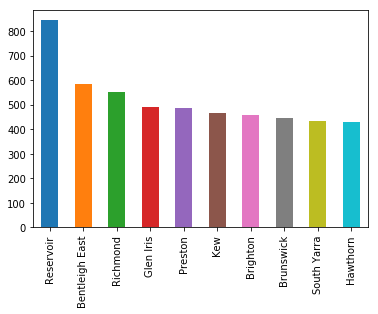

In [8]:
df['Suburb'].value_counts().head(10).plot.bar()


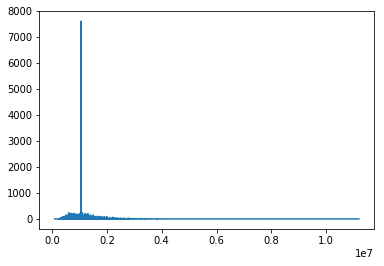

In [10]:
df = df.fillna(df.mean())
df['Price'].value_counts().sort_index().plot.line()

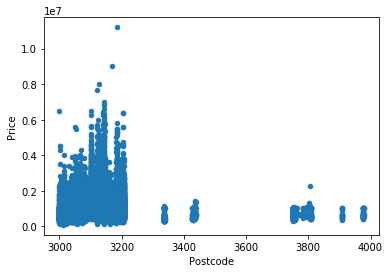

In [12]:
df.plot.scatter(x='Postcode', y='Price')

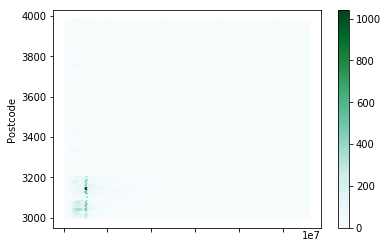

In [14]:
df.plot.hexbin(x='Price', y='Postcode')

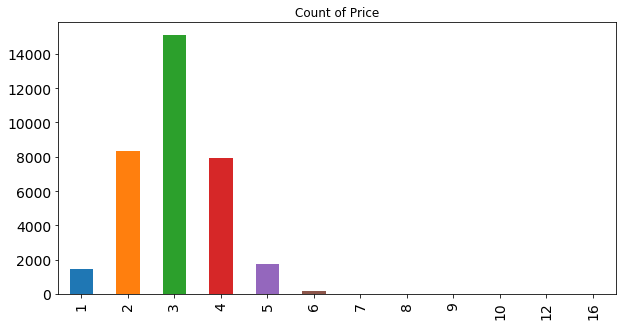

In [16]:
df['Rooms'].value_counts().sort_index().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    title = "Count of Rooms"
)

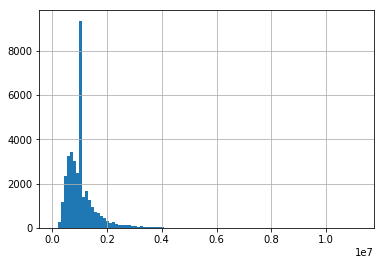

In [25]:
%matplotlib inline
df.Price.hist(bins=100)

In [31]:
df['Date']=pd.to_datetime(df.Date)
df['Year']=df.Date.dt.year
df['Month']=df.Date.dt.year
df['Day']=df.Date.dt.year
df['Weekday']=df.Date.dt.dayofweek
prices_df=df.groupby(['Suburb','Year','Type','Rooms'],as_index=False).Price.median()
prices_df.columns=['Suburb','Year','Type','Rooms','Median_price']
prices_df.head()

,Suburb,Year,Type,Rooms,Median_price
0,Abbotsford,2016,h,2,1.050173e+06
1,Abbotsford,2016,h,3,1.195000e+06
2,Abbotsford,2016,h,4,1.050173e+06
3,Abbotsford,2016,t,2,7.960000e+05
4,Abbotsford,2016,u,1,4.570000e+05


In [36]:
df=df.merge(prices_df,on=['Suburb','Year','Type','Rooms'])
df['Sold_Above_Median']=0
df.loc[df.Price>prices_df.Median_price,'Sold_Above_Median']=1
df.head()

ValueError: Can only compare identically-labeled Series objects

In [38]:
bins=[0,5,10,15,20]
import numpy as np
df['distance_bins']=np.digitize(df.Distance,bins)
df.distance_bins.value_counts()

2    11726
3    11225
1     5024
4     3495
5     3387
Name: distance_bins, dtype: int64

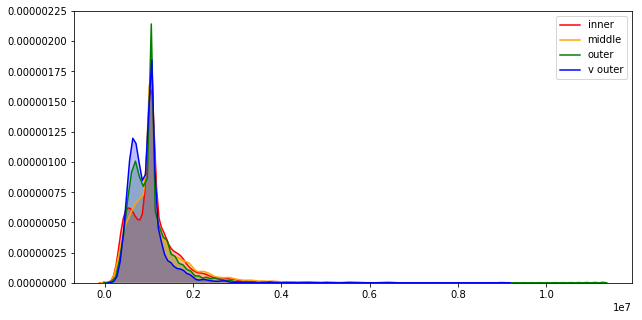

In [40]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import seaborn as sns
melbourne_house_prices=df.loc[df.Type=='h','Price'].median()
melbourne_unit_prices=df.loc[df.Type=='u','Price'].median()

inner_zone=df[df.distance_bins==1]
middle_zone=df[df.distance_bins==2]
outer_zone=df[df.distance_bins==3]
vouter_zone=df[df.distance_bins==4]

fig1=sns.kdeplot(inner_zone.Price,color='red',shade=True)
fig2=sns.kdeplot(middle_zone.Price,color='orange',shade=True)
fig3=sns.kdeplot(outer_zone.Price,color='green',shade=True)
fig4=sns.kdeplot(vouter_zone.Price,color='blue',shade=True)

plt.legend(['inner','middle','outer','v outer'])
#Trhend by each zone

Text(0.5, 1.0, 'Inner zone Unit ')

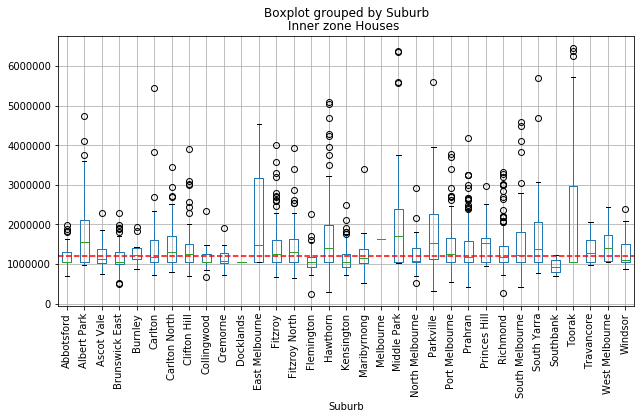

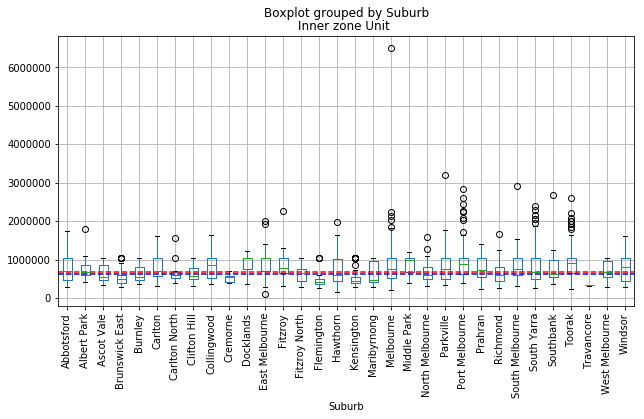

In [41]:
inner_zone_h=inner_zone[inner_zone.Type=='h']
median_price_houses_inner_zone=inner_zone_h.Price.median()

figr=inner_zone_h.boxplot(by='Suburb',column='Price',rot=90)

plt.axhline(y=median_price_houses_inner_zone,color='red',linestyle='dashed')
plt.title('Inner zone Houses ')
inner_zone_u=inner_zone[inner_zone.Type=='u']

median_price_units_inner_zone=inner_zone_u.Price.median()

figr=inner_zone_u.boxplot(by='Suburb',column='Price',rot=90)
plt.axhline(y=median_price_units_inner_zone,color='red',linestyle='dashed',label='Zone unit prices')
plt.axhline(y=melbourne_unit_prices,color='blue',linestyle='dashed',label='Melbourne unit prices')

plt.title('Inner zone Unit ')

Text(0.5, 1.0, 'Middle ring Unit prices')

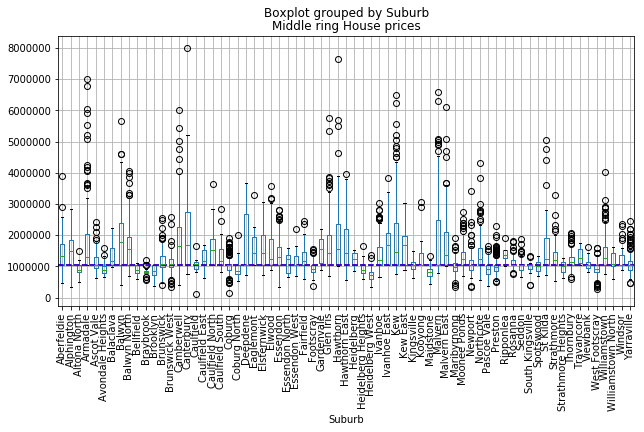

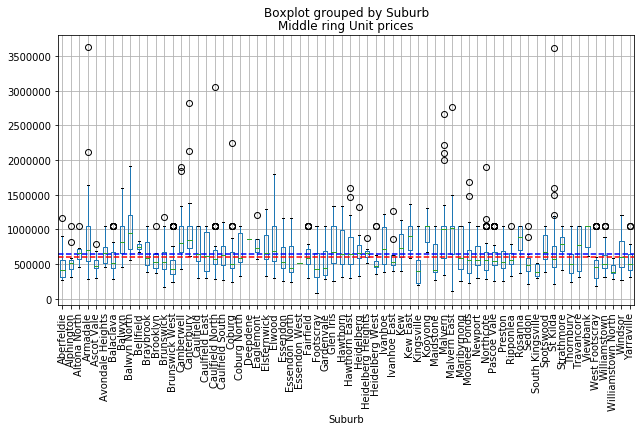

In [42]:
middle_zone_h=middle_zone[middle_zone.Type=='h']
figr=middle_zone_h.boxplot(by='Suburb',column='Price',rot=90)
middle_zone_median_h=middle_zone_h.Price.median()
plt.axhline(y=middle_zone_median_h,color='red',linestyle='dashed')
plt.axhline(y=melbourne_house_prices,color='blue',linestyle='dashed')

plt.title('Middle ring House prices')
middle_zone_u=middle_zone[middle_zone.Type=='u']
figr=middle_zone_u.boxplot(by='Suburb',column='Price',rot=90)
middle_zone_median_u=middle_zone_u.Price.median()
plt.axhline(y=middle_zone_median_u,color='red',linestyle='dashed')
plt.axhline(y=melbourne_unit_prices,color='blue',linestyle='dashed')

plt.title('Middle ring Unit prices')

Text(0.5, 1.0, 'Outer ring Units')

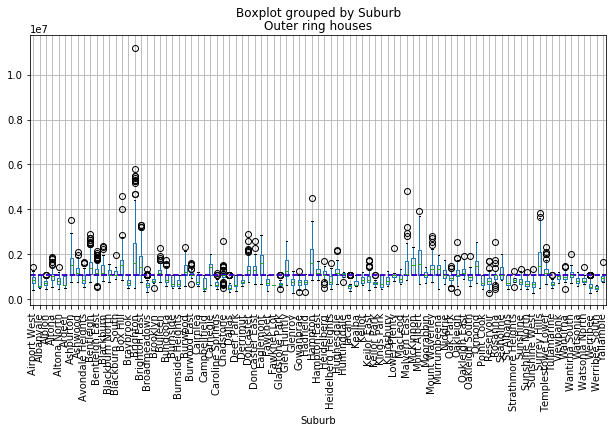

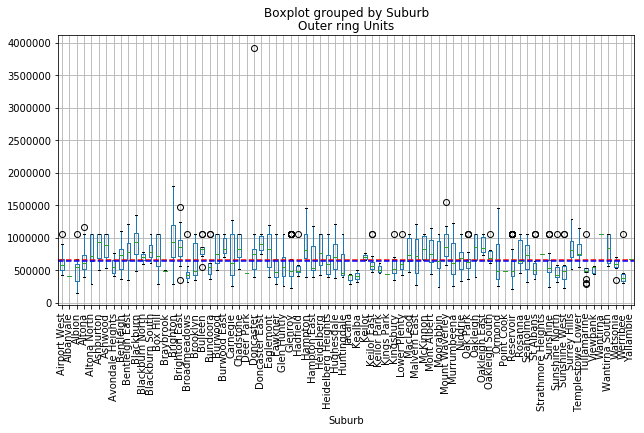

In [43]:
outer_zone_h=outer_zone[outer_zone.Type=='h']
figr=outer_zone_h.boxplot(by='Suburb',column='Price',rot=90)
outer_zone_median_h=outer_zone_h.Price.median()
plt.axhline(y=outer_zone_median_h,linestyle='dashed',color='red')
plt.axhline(y=melbourne_house_prices,color='blue',linestyle='dashed')

plt.title('Outer ring houses')
outer_zone_u=outer_zone[outer_zone.Type=='u']
figr=outer_zone_u.boxplot(by='Suburb',column='Price',rot=90)
outer_zone_median_u=outer_zone_u.Price.median()
plt.axhline(y=outer_zone_median_u,linestyle='dashed',color='red')
plt.axhline(y=melbourne_unit_prices,color='blue',linestyle='dashed')

plt.title('Outer ring Units')